<div dir="rtl" class="alert alert-block alert-info"> <font size="5" face="HM XNiloofar"> 
<b> یادگیری تقویتی - دکتر گلستانی: تمرین شبیه‌سازی دوم </b>
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br />
فقط قسمت‌های <code>TODO</code> را پر کنید و  Jupyter Notebook تکمیل شده را به فرمت <code>ipynb</code> و <code>html</code> به عنوان گزارش خود در CW آپلود کنید. <br />
در این تمرین شما در یک محیط بازی Multi-armed bandit روش‌های optimistic-initial ،zero-initial ،tau-softmax ،epsilon-greedy و incremental implementation را پیاده‌سازی می‌کنید و با تاثیر پارامتر‌های مختلف در الگوریتم‌ها آشنا می‌شوید. <br />
</font> </div>


<div dir="rtl" class="alert alert-block alert-info"> <font size="5" face="HM XNiloofar"> 
</font> </div>
<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<b>
<br />
</font> </div>


***You can jump directly to these sections:***

+ [A. Preparations](#A.-Preparations)
    + [1. Reward function](#1.-Reward-function)
    + [2. epsilon-greedy policy](#2.-epsilon-greedy-policy)
    + [3. tau-softmax policy](#3.-tau-softmax-policy)
+ [B. Learning](#B.-Learning)
    + [1. Zero-initial and epsilon-greedy policy](#1.-Zero-initial-and-epsilon-greedy-policy)
    + [2. Optimistic-initial and epsilon-greedy policy](#2.-Optimistic-initial-and-epsilon-greedy-policy)
    + [3. Zero-initial and tau-softmax policy](#3.-Zero-initial-and-tau-softmax-policy)
    + [4. Optimistic-initial and tau-softmax policy](#4.-Optimistic-initial-and-tau-softmax-policy)
    + [5. Incremental implementation](#5.-Incremental-implementation)
    + [6. High-variance environment](#6.-High-variance-environment)
+ [Give Us Feedback](#Give-Us-Feedback)
---

**The multi-armed bandit model ([Wikipedia])**

The multi-armed bandit (short: bandit or MAB) can be seen as a set of real distributions $B=\{R_{1},\dots ,R_{K}\}$, each distribution being associated with the rewards delivered by one of the $K\in \mathbb {N} ^{+}$ levers. Let $\mu _{1},\dots ,\mu _{K}$ be the mean values associated with these reward distributions. The gambler iteratively plays one lever per round and observes the associated reward. The objective is to maximize the sum of the collected rewards. The horizon $H$ is the number of rounds that remain to be played. The bandit problem is formally equivalent to a one-state Markov decision process. The regret $\rho$  after $T$ rounds is defined as the expected difference between the reward sum associated with an optimal strategy and the sum of the collected rewards:

$\rho =T\mu ^{*}-\sum _{t=1}^{T}{\widehat {r}}_{t},$

where $\mu ^{*}$ is the maximal reward mean, $\mu ^{*}=\max _{k}\{\mu _{k}\}$, and ${\widehat {r}}_{t}$ is the reward in round $t$.

A zero-regret strategy is a strategy whose average regret per round $\rho /T$ tends to zero with probability 1 when the number of played rounds tends to infinity. Intuitively, zero-regret strategies are guaranteed to converge to a (not necessarily unique) optimal strategy if enough rounds are played.

[Wikipedia]:https://en.wikipedia.org/wiki/Multi-armed_bandit


<div style="margin: 20px" class="alert alert-block alert-success"> <font size="4"> <b> Game environment:</b> We have 11 arms 🎰 with associated rewards $[R_1, \ldots, R_{11}]$ where $$ R_k \sim \mathcal{N}(k-6, 1).$$ </font> </div>

---

# A. Preparations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Run the following cell to see the reward functions.

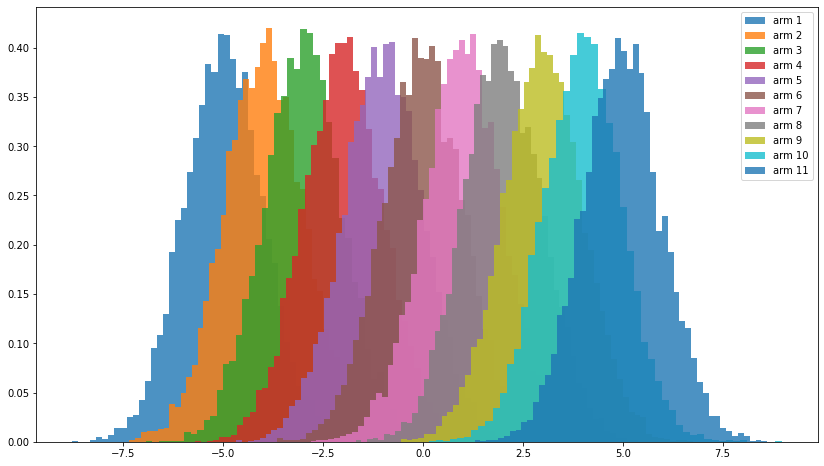

In [2]:
# Reward Distributions
mus = np.array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
sigmas = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
num_arms = len(mus)
sample_size = 10000

plt.figure(figsize=(14,8))
for mu, sigma, idx in zip(mus, sigmas, range(num_arms)):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=50, density=True, alpha=0.8, label=f'arm {idx+1}')
plt.legend()
plt.show()

## 1. Reward function

Define reward function which gets arm number as input and returns reward.

In [3]:
def reward(arm):
    # TODO
    r = np.random.normal(arm-5, 1)
    return r

In [4]:
reward(0)

-4.661893838200204

**Optimistic initial action values** 

See [Reinforcement Learning: An Introduction], By Richard S. Sutton, Andrew G. Barto, Section 2.7;

[Reinforcement Learning: An Introduction]:https://books.google.nl/books?id=U57uDwAAQBAJ&printsec=frontcover#v=onepage&q&f=false

In [5]:
Qs = 10 + 0.01 * np.random.rand(num_arms)
Qs

array([10.0028514 , 10.00485841, 10.00051911, 10.00982877, 10.00768228,
       10.00787603, 10.00204774, 10.00694125, 10.00785663, 10.00886996,
       10.00756639])

## 2. epsilon-greedy policy

Define decision function for action selection using $\epsilon$-greedy policy.

In [6]:
def select_arm_e_greedy(Qs, epsilon):
    # TODO
    if np.random.uniform(0,1) >= epsilon:
        arm = np.argmax(Qs) 
    else:
        arm = np.random.randint(0,11)
    return arm

In [7]:
select_arm_e_greedy(Qs,0.1)

3

## 3. tau-softmax policy

**Softmax Action Selection**

[Reinforcement Learning: An Introduction], By Richard S. Sutton, Andrew G. Barto, Section 2.3;



Although $\varepsilon $-greedy action selection is an effective and popular means of balancing exploration and exploitation in reinforcement learning, one drawback is that when it explores it chooses equally among all actions. This means that it is as likely to choose the worst-appearing action as it is to choose the next-to-best action. In tasks where the worst actions are very bad, this may be unsatisfactory. The obvious solution is to vary the action probabilities as a graded function of estimated value. The greedy action is still given the highest selection probability, but all the others are ranked and weighted according to their value estimates. These are called softmax action selection rules. The most common softmax method uses a Gibbs, or Boltzmann, distribution. It chooses action $a$ on the $t-$th play with probability:

$$\frac{ e^{Q(a)/ \tau} }{\sum_a e^{Q(a)/ \tau}}$$

temprature ($\tau$) in the above formula influences how randomly actions should be chosen:


*   if $\tau$ is high, the exponentials approach 1, the fraction approaches 1/(number of actions), and each action has approximately the same probablity of being chosen (exploration or exploitation?)
*   as $\tau \rightarrow 0$, the exponential with the highest Q(a) dominates, and the current action is always chosen (exploration or exploitation?)


[Reinforcement Learning: An Introduction]:https://books.google.nl/books?id=U57uDwAAQBAJ&printsec=frontcover#v=onepage&q&f=false



Define decision function for action selection using softmax policy.

In [8]:
def select_arm_softmax(Qs, temperature):
    # TODO
    pi = np.exp(Qs/temperature)/np.sum(np.exp(Qs/temperature))
    arm = np.random.choice(range(num_arms), p=pi)
    return arm

In [9]:
select_arm_softmax(Qs, 1)

0

# B. Learning

## 1. Zero-initial and epsilon-greedy policy

With zero-initial `Qs = 0 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\varepsilon=$ `[0.0, 0.01, 0.1, 0.5, 'dec']`-greedy policy. Repeat it 1000 times and then average. Plot average rewards against trials (all plots should be in a single figure). Analyze the results (in terms of convergence, etc.). `'dec'` indicates that $\varepsilon$ decreases linearly from `0.2` to `0.0` during the training. [Here](https://drive.google.com/file/d/1RM8W-9NmcZIP7opNrk5F9hrFWHIaByua/view?usp=sharing) is what we expect. 

**Your answer: ```TODO ```**

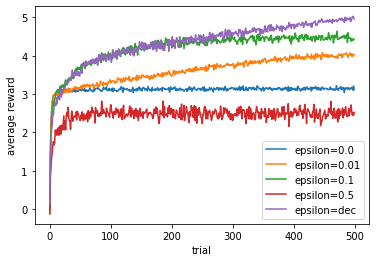

In [10]:
epsilon_list = [0.0, 0.01, 0.1, 0.5, 'dec']
num_test = 1000
trial = 500
for epsilon in epsilon_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if epsilon == 'dec':
                epsilonDec = 0.2 - (i+1)*0.2/trial
                arm = select_arm_e_greedy(Qs, epsilonDec)
            else:
                arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm]) 
            reward_trial_track.append(R)
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='epsilon='+str(epsilon))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
همان طور که از نمودار مشخص است. همه ی نمودار ها همگرا شده اند.

الگوریتم حریصانه:

در اپسلیون برابر صفر که همان الگوریتم حریصانه است، نسبت به بقیه ی حالات 
کمی سریع تر همگرا میشود، که به دلیل همین حریصانه بودن است. با توجه به این که در هر مرحله اقدامی انتخاب میشود که بیشترین ولیو را ایجاد کند، این الگوریتم عملا راهی برای exploration ندارد و تنها exploit میکند.
بنابراین الگوریتم حریصانه در ابتدا از بین اقداماتی انتخاب می‌کند که هنوز امتحان نشده‌اند و بنابراین تخمینی از ارزش واقعی آنها ندارند. علاوه بر این، در فرصتی که یک اکشن انتخاب شده باشد، هیچ تضمینی وجود ندارد که این بهترین اکشن باشد و از آنجایی که الگوریتم حریصانه اکنون روی عملکرد  انتخابی قفل شده است، هیچ اکشن دیگری برای تأیید اینکه آیا اکشن فعلی بهترین اکشن است آزمایش نمی شود. بنابراین اکشن هایی که می توانند در نهایت ریوارد بیشتری را فراهم کنند، از دست خواهند رفت. در نهایت این 
الگوریتم به عدد
$(1+2+3+4+5)/5 = 3$
زیرا از الگوریتم از بین arm های
با میانگین مثبت انتخاب میکند(arm های با میانگین منفی ولیو را کاهش میدهند و در مراحل بعدی انتخاب نمیشوند.) که میانگین این اعداد در نهایت برابر با ۳ خواهد بود.

الگوریتم اپسیلون گریدی:

در بقیه ی حالات از الگوریتم اپسیلون گریدی با اپسیلون ثابت استفاده شده است. در این روش مشکل ذکر شده در حالت قبل را رفع کرده است. بدین معنی که در این روش عمل exploration دخیل شده است.
در این روش همانند حالت حریصانه است. با این تفاوت که در هر مرحله با احتمال اپسیلون عمل ما تصادفی انتخاب میشود. بنابراین در این روش کاوش هم داریم. اما مقداری که در این روش الگوریتم به آن همگرا میشود برابر با 
$5 * (1 - ε) + ε * Σmeans/11 = 5 * (1 - ε)$
(زیرا میانگین بازوها برابر ۰ است.)
است. دلیل این امر هم این است که الگوریتم در ε درصد مواقع در حال اکتشاف
و در بقیه ی مواقع الگوریتم حریصانه را اجرا میکند که در نهایت انتظار داریم اکسپکتت ولیو آن ۵ یعنی بهترین ماشین باشد. پس در نهایت ریوارد به مقدار 
$5 * (1 - ε)$
همگرا میشود.
سرعت همگرایی در این الگوریتم ها با افزایش اپسیلون افزایش می یابد. زیرا اپسیلون عملا همان سرعت exploration هست که بنابراین الگوریتم با سرعت بیشتری اکشن بهینه را پیدا میکند. برای مثال میبینید که در اپسیلون برابر ۰.۰۱ سرعت رسیدن به مقدار نهایی بسیار کم است و در ۵۰۰ trial 
به مقدار نهایی که برابر ۴.۹۵ است نمیرسد و نیاز داریم تعداد trail بیشتری صبر کنیم.

'dec':

در این روش از مزیت های هر دو روش قبل بهره میبریم. به این صورت که ابتدا اپسیلون زیاد و برابر ۰.۲ انتخاب میشود و الگوریتم با سرعت بیشتری(نسبت به حالات با اپسیلون کمتر در روش های اپسیلون گریدی) explore میکند.
هر چه جلوتر میرویم این الگوریتم اپسیلون کمتری اختیار میکند و به سمت exploit می رود.
تا در نهایت که اپسیلون برابر با صفر میشود و عملا به الگوریتم حریصانه بدل میشود. به همین دلیل انتظار داریم در نهایت به مقدار بهینه یعنی ۵ همگرا شود. که در صورت افزایش trial این اتفاق خواهد افتاد.

</font> </div>

## 2. Optimistic-initial and epsilon-greedy policy

With optimistic-initial `Qs = 10 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\varepsilon=$ `[0.0, 0.01, 0.1, 0.5, 'dec']`-greedy policy. Repeat it 1000 times and then average. Plot average rewards against trials. Compare the result with [Question 1](#1.-Zero-initial-and-epsilon-greedy-policy).


**Your answer: ```TODO ```**

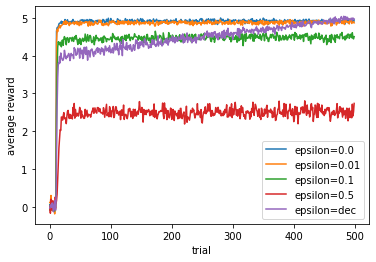

In [ ]:
epsilon_list = [0.0, 0.01, 0.1, 0.5, 'dec']
num_test = 1000
trial = 500
for epsilon in epsilon_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 10 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if epsilon == 'dec':
                epsilonDec = 0.2 - (i+1)*0.2/trial
                arm = select_arm_e_greedy(Qs, epsilonDec)
            else:
                arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='epsilon='+str(epsilon))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

در این روش هم مانند حالات قبل با توجه به نکاتی که ذکر شد انتظار داریم به مقادیر ذکر شده
(۵ برای 'dec' و اپسیلون برابر ۰
و 
$5 * (1 - ε)$
برای بقیه ی حالات)
همگرا شوند.

در این روش مقادیر اولیه Qs ها
روی مقداری بالاتر از خروجی های ممکن bandit ها تنظیم شده است.

الگوریتم حریصانه:

با این عمل، هر بار که یک اکشن انتخاب میشود ولیو متناظر آن اکشن کاهش می یابد. پس مقدار ولیو کمتری از بقیه دارد و بنابراین در مرحله ی بعد این اکشن انتخاب نخواهد شد. به همین ترتیب در ۱۱ مرحله ی اول همه ی arm ها انتخاب میشوند و عمل exploration را داریم.
به همین ترتیب در هر مرحله arm ی که ولیو کمتری دارد انتخاب نمیشود.
بنابراین در مراحل اولیه شاهد exploration الگوریتم خواهیم بود و این روش 
اکشنی که منجر به بهترین عملکرد میشود را پیدا میکند، بدون این که زمان زیادی صرف شود. یعنی در چند مرحله ی اول در حال اکتشاف خواهیم بود تا زمانی که ولیو ها کمتر از ماکسیمم ولیو بشود و نیز خود ولیو بیشینه به مقدار بیشینه خود که در این جا ۵ است برسد. یعنی نیازی نداریم تا همه ی ولیو ها به مقدار میانگینشان همگرا شوند و همین که به مقداری کمتر از ۵ برسند الگوریتم دیگر آن ها را انتخاب نخواهد کرد و اکشنی که ولیو ۵ را میدهد انتخاب خواهد کرد(بث روی میانگین است). یعنی لزوما مقادیر ولیو غیربییشنه به مقدار میانگین حقیقیشان همگرا نخواهند شد. پس سرعت همگرایی بیشتری را نسبت به حالت قبل شاهد هستیم.

نکته ی قابل توجه این است که این الگوریتم حریصانه در این روش بر خلاف سوال قبل کار میکند و به مقدار ۵(کمی کمتر) همگرا میشود که با توجه به توضیحاتی که داده شد منطقی است. به این دلیل مقدار نهایی کمی کمتر از ۵ است که چون واریاس ۱ روی داده ها داریم ممکن است هنگام انتخاب بازوی ۱۱ ام مقدار ریوارد ۴ دریافت شود و بازوی بهینه اشتباها بازوی ۴ تشخیص داده شود که درست نیست.

الگوریتم اپسیلون گریدی:

در این روش یک حالت تصادفی برای انتخاب اکشن ایجاد شده که با احتمال اپسیلون اکشنی غیر از اکشن بهینه انتخاب شود. به همین دلیل در نهایت به مقدار 
$5 * (1 - ε)$
همگرا خواهد شد.
در این روش برخلاف حالت قبل با افزایش اپسیلون سرعت همگرایی کاهش خواهد یافت. دلیل این امر فاصله گرفتن از انتخاب اکشن بهینه است که الگوریتم حریصانه انجام میدهد. با توجه به exploration 
که در الگوریتم حریصانه انجام میشود لزومی به استفاده از این روش نیست و  و استفاده از اپسیلون تنها موجب به روزرسانی ولیو مقادیر غیربهینه و نزدیک شدنشان به مقدار میانگینشان است که لزومی نداشت. در کل الگوریتم حریصانه عملکرد بهتری خواهد داشت.

نکته ی قبل توجه سرعت همگرایی به مقدار نهایی است که نسبت به سوال ۱ بسیار سرعت بیشتری دارد که در توضیح الگوریتم حریصانه صحبت شد.

'dec':

با توجه به توضیحات داده شده ابتدا بسیار سریع اکشن بهینه را پیدا میکند. سپس به صورت تقریبا خطی به سمت مقدار بهینه در اپسیلون متناظر در 
trial خاص حرکت میکند.
یعنی از ۴(در اپسیلون ۰.۲) به سمت ۵(در اپسیلون ۰.۰) حرکت میکند که در نمودار میبینید.

در این حالت چون در ابتدا explore داریم نسبت به حالت greedy در نهایت عملکرد بهتری خواهیم داشت. زیرا با explore ابتدایی مقادیر نهایی ولیوها به صورت دقیق تری به مقدار نهایی خود همگرا میشوند و در نهایت الگوریتم با احتمال بسیار بیشتری اکشن بهینه را خواهد یافت.

</font> </div>

## 3. Zero-initial and tau-softmax policy

With zero-initial `Qs = 0 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\tau=$ `[0.1, 1.0, 2.0, 10.0, 'dec']`-softmax policy. Repeat it 1000 times and then average. Plot average rewards against trials. `'dec'` indicates that $\tau$ decreases linearly from `1.0` to `0.1` during the training. Compare the result with [Question 1](#1.-Zero-initial-and-epsilon-greedy-policy).


**Your answer: ```TODO ```**

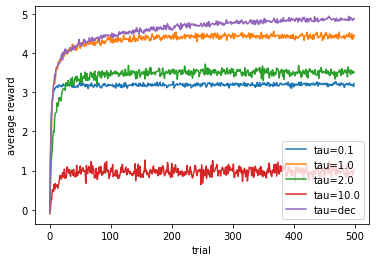

In [ ]:
tau_list = [0.1, 1.0, 2.0, 10.0, 'dec']
num_test = 1000
trial = 500
for tau in tau_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if tau == 'dec':
                tauDec = 1 - (i+1)*0.9/trial
                arm = select_arm_softmax(Qs, tauDec)
            else:
                arm = select_arm_softmax(Qs, tau) 
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='tau='+str(tau))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

tau = 0.1

با توجه به فرمول وزن ها در این روش، هر چه tau
کمتر باشد(به سمت صفر میل کند)، اثر اختلاف در ولیو روی احتمال انتخاب اکشن متناظر تاثیر بیشتر دارد
(نسبت این احتمال بین دو ولیو برابر 
$e^{Q_1-Q_2/tau}$
)
بنابراین در tau کمتر به سمت 
الگوریتم greedy حرکت میکنیم.
که همان که طور که از شکل پیداست میبینیم که در tau
برابر ۰.۱ به الگوریتم greedy شبیه شده 
و همانند آن به سمت ۳ همگرا شده است. 



tau = [1, 2 ,10]

از طرف دیگر هر چه tau 
بیشتر باشد(به سمت بی نهایت میل کند)، یعنی اثر اختلاف در ولیو ها روی احتمال اکشن متناظر کمتر است که یعنی از greedy بودن خارج شده و
به explore اعتبار بیشتری میدهیم که در نتیجه الگوریتم گویی با احتمال یکنواخت(در tau بینهایت) انتخاب میکند.
در این حالات اثر همه ی بازوها را در انتخاب شان تاثیر دارد و با توجه به tau 
انتخاب شده reward
نهایی برابر خواهد بود با:

$$ Reward = \frac{-5*e^{-5/tau}-4*e^{-4/tau}-3*e^{-3/tau}-2*e^{-2/tau}-e^{-1/tau}+0*e^{0/tau}+e^{1/tau}+2*e^{2/tau}+3*e^{3/tau}+4*e^{4/tau}+5*e^{5/tau}}
{e^{-5/tau}+e^{-4/tau}+e^{-3/tau}+e^{-2/tau}+e^{-1/tau}+e^{0/tau}+e^{1/tau}+e^{2/tau}+e^{3/tau}+e^{4/tau}+e^{5/tau}} $$
همان طور که از معادله پیداست در tau های کمتر اثر
ریوارد های منفی بسیار کاهش می یابد و عملا در محاسبات نقشی ندارند. اما هر چه tau بیشتر باشد اثر این بازو ها ظاهر خواهد شد.

 در نهایت ریوارد ها در tau های مختلف را محاسبه و در زیر نمایش میدهیم:

$tau = 1.0$


$Reward =  4.41$

~

$tau = 2.0$

$Reward =  3.50$

~

$tau = 10.0$

$Reward =  0.98$

همان طور که میبینیم و توضیح داده شد، با افزایش tau
سیاست انتخاب بازو به سمت یکنواخت بودن پیش میرود و ریوارد نهایی کاهش میابد.

'dec':

در این قسمت ابتدا tau برابر
۱ است.
یعنی الگوریتم فرصت اکسپلور را دارد. در ادامه هر چه جلوتر میرویم مقدار tau
کمتر شده که یعنی داریم به سمت الگوریتم greedy حرکت میکنیم و 
با توجه به این که در این حالت الگوریتم روش بهینه را یافته است(توضیحات مفصل تر در قسمت ۱  داده شده)
در ادامه exploit
میکند و بنابراین به عدد ۵(عدد دقیق تر را از میتوان از رابطه ی ذکر شده در قسمت قبل به دست آوردن که حدودا برابر ۴.۹۹ میشود) همگرا میشود.

</font> </div>

In [25]:
tau_list = [1.0, 2.0, 10.0]
for tau in tau_list:
    num = -5*np.exp(-5/tau)-4*np.exp(-4/tau)-3*np.exp(-3/tau)-2*np.exp(-2/tau)-np.exp(-1/tau)+0*np.exp(0/tau)+np.exp(1/tau)+2*np.exp(2/tau)+3*np.exp(3/tau)+4*np.exp(4/tau)+5*np.exp(5/tau)
    denum = np.exp(-5/tau)+np.exp(-4/tau)+np.exp(-3/tau)+np.exp(-2/tau)+np.exp(-1/tau)+np.exp(0/tau)+np.exp(1/tau)+np.exp(2/tau)+np.exp(3/tau)+np.exp(4/tau)+np.exp(5/tau)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('tau =',tau)
    print('Reward = ',num/denum)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tau = 1.0
Reward =  4.418207014907833
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tau = 2.0
Reward =  3.5036448758923764
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tau = 10.0
Reward =  0.9802353039300933


<div dir="rtl"> <font size="4" face="HM XNiloofar"> 



</font> </div>

## 4. Optimistic-initial and tau-softmax policy

With optimistic-initial `Qs = 10 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\tau=$ `[0.1, 1.0, 2.0, 10.0, 'dec']`-softmax policy. Repeat it 1000 times and then average. Plot average rewards against trials. Compare the result with the previous questions.

**Your answer: ```TODO ```**

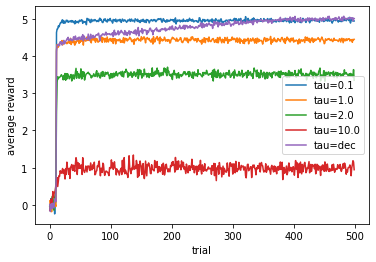

In [ ]:
tau_list = [0.1, 1.0, 2.0, 10.0, 'dec']
num_test = 1000
trial = 500
for tau in tau_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 10 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if tau == 'dec':
                tauDec = 1 - (i+1)*0.9/trial
                arm = select_arm_softmax(Qs, tauDec)
            else:
                arm = select_arm_softmax(Qs, tau) 
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='tau='+str(tau))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

tau = 0.1

در tau برابر
۰.۱ همان طور که در قسمت قبل صحبت شد الگوریتم
همانند روش greedy عمل میکند و از طرفی چون 
initial value برابر
با ۱۰ است  و مقداری خوشبینانه انتخاب شده مانند بخش دو میشود که 
الگوریتم greedy بسیار سریع یاد میگیرد و در نزدیک ۵ همگرا میشود. 
دلیل این امر توانایی explore
کردن الگوریتم greedy
با انتخاب initial value خوشبینانه است که در بخش دو به طور مفصل توضیح داده شد. دلیل این که مقدار نهایی ریوارد کمی کمتر از ۵ است این است که با توجه به واریانس روی ولیوها در تعداد کمی از مواقع بازوی دهم به عنوان اکشن بهینه انتخاب میشود نه بازوی یازدهم.

tau = [1.0, 2.0, 10.0]

همان طور که در قسمت دو صحبت شد این روش نسبت به حالت قبل سرعت بیشتری دارد(به دلیل explore سریع تر از قبل و  یافتن سریع تر بازوی بهینه که در قسمت دو به طور مفصل توضیح داده شد.) و همچنان مقادیر همگرایی همان مقادیر همگرایی در قمسمت ۳ است.

tau = dec

همان بخش دو به سرعت همگرا شده و ابتدا با شروع از مقدار نهایی ریوارد در 
tau = 1.0
به سمت مقدار نهایی یعنی ۵ حرکت میکند(به صورت تقریبا خطی).
در این حالت چون در ابتدا explore داریم نسبت به حالت 0.1
عملکرد بهتری خواهیم داشت. زیرا با explore ابتدایی مقادیر نهایی ولیوها به صورت دقیق تری به مقدار نهایی خود همگرا میشوند و در نهایت الگوریتم با احتمال بسیار بیشتری اکشن بهینه را خواهد یافت.

</font> </div>

## 5. Gradient Bandit Algorithms

Reinforcement Learning: An Introduction, Second edition, By Richard S. Sutton, Andrew G. Barto, Section 2.8;

$$Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b=1}^k e^{H_t(b)}} = \pi_t(a)$$

On each step, after selecting action $A_t$ and receiving the reward $R_t$, the action preferences are updated by:
$$H_{t+1}(a) = H_t(a) + \alpha (R_t - \bar{R}_t) \big(1_{a=A_t} - \pi_t(a)\big), \forall a,$$
where $\bar{R}_t$ is the average of all the rewards, i.e.,
$$\bar{R}_t = \frac{1}{t}(R_1 + \ldots + R_t).$$

With zero-initial `Hs = 0 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\alpha=$ `[0.01, 0.1, 0.5, 1.0, 'dec']`. Repeat it 1000 times and then average. Plot average rewards against trials. Analyze the results. `'dec'` indicates that $\alpha$ decreases linearly from `0.15` to `0.05` during the training.

**Your answer: ```TODO ```**

In [30]:
def select_arm_GBA(Hs):
    # TODO
    pi = np.exp(Hs)/np.sum(np.exp(Hs))
    arm = np.random.choice(range(num_arms), p=pi)
    return arm, pi

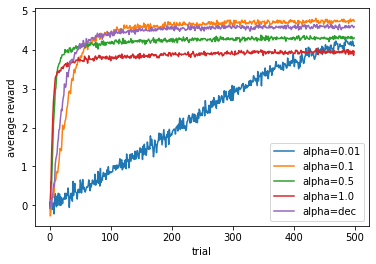

In [27]:
alpha_list = [0.01, 0.1, 0.5, 1.0, 'dec']
num_test = 1000
trial = 500
for alpha in alpha_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Hs = 0 + 0.01 * np.random.rand(num_arms)
        R_avg = 0
        # Trial
        reward_trial_track = []
        for i in range(trial):
            arm, pi = select_arm_GBA(Hs)
            R = reward(arm)
            R_avg = R_avg + (1/(i+1))*(R - R_avg)
            one_arr = np.zeros(11)
            one_arr[arm] = 1.0
            if alpha == 'dec':
                alphaDec = 0.15 - (i+1)*0.1/trial
                Hs = Hs + alphaDec * (R - R_avg) * (one_arr - pi) 
            else:
                Hs = Hs + alpha * (R - R_avg) * (one_arr - pi) 
                
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='alpha='+str(alpha))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

عملکرد کلی این الگوریتم به این صورت است که با تعیین مقدار آلفا در این روش گرادیانی به سمت نقطه ی بهینه حرکت کنیم. همان طور که از روش به روزرسانی مشخص است، هر بار که یک بازو کشیده میشود اگر جایزه ی به دست آمده بیش از میانگین جایزه ها تا کنون باشد مقدار ولیو(Hs)
متناظر افزایش و مقدار بقیه ی ولیوها کاهش می یابد(متناسب با ضریب آلفا).
که در نتیجه در مرحله ی بعدی احتمال انتخاب این بازو افزایش خواهد یافت.(برعکس همین سناریو برای حالتی که جایزه کمتر از جایزه مینگین باشد رخ میدهد.)

alpha = [0.01, 0.1, 0.5, 1.0]

 مقدار آلفا سرعت حرکت به سمت نقطه ی بهینه را مشخص میکند.
هر چه مقدار آلفا کمتر باشد، یعنی با سرعت کمتری در حال یادگیری و به روزرسانی ولیو ها هستیم. که در نتیجه سرعت همگرایی و رسیدن به مقدار نهایی کم خواهد بود. مانند آلفا برابر ۰.۰۱ که همان طور که میبینیم با سرعت بسیار کمی در حال به روزرسانی و رسیدن به مقدار نهایی است و همچنان در ۵۰۰ گام به مقدار نهایی خود همگرا نشده است. این دیررسیدن به مقدار نهایی این فرصت را به الگوریتم میدهد که exploration داشته باشد
و در نهایت به مقدار بالاتری همگرا شود. که این را در نمودار هم مشاهده میکنیم. از طرفی، هر چه مقدار آلفا بیشتر شود، سرعت به روزرسانی ولیوها بیشتر خواهد شد که ممکن است به اشتباه بازویی بهینه تشخیص داده شود و ولیو آن بسیار افزایش یابد به طوری که فرصت جبران نباشد که به نوعی به سمت الگوریتم حریصانه شدن حرکت میکنیم. که همان طور که در نمودار هم مشاهده میشود با افزایش آلفا مقدار نهایی ریوارد کم شده است. مشکل دیگر زیاد بودن آلفا نوسان حول مقدار مقدار نهایی با توجه به واریانسی که نمونه ها دارند میباشد که چه بسا از نقطه ی بهینه دور شویم.

alpha = dec

در این روش ابتدا مقدار ۰.۱۵ برای آلفا انتخاب شده است که سرعت به روزرسانی ولیو ها بیشتر باشد و از مقادیر با ولیو منفی دور شویم. در ادامه هر چه جلوتر میرویم آلفا کاهش میابد تا از نوسان حول نقطه ی همگرایی روش جلوگیری شود. در مقایسه با حالت های دیگر با آلفا ثابت میتوان دید که سرعت همگرایی در ابتدا با توجه به انتخاب آلفا ۰.۱۵ از آلفا های ۰.۱ و ۰.۰۱ بیشتر و از آلفا های ۰.۵ و ۱.۰ کمتر است. نیز مقدار نهایی
با توجه به آلفای ۰.۰۵ از آلفاهای ۰.۱ و ۰.۰۱(در صورت ادامه گام ها) کمتر و از آلفا های ۰.۵ و ۱.۰ بیشتر است که با توضیحاتی که داده شد همخوانی دارد.
</font> </div>

## 6. Incremental implementation

With zero-initial `Qs = 0 + 0.01 * np.random.rand(num_arms)`, train an agent for 500 trials using $\varepsilon =$ `0.1`-greedy policy and $\alpha=$ `[0.01, 0.1, 0.5, 1.0, 'dec']`. Repeat it 1000 times and then average. Plot average rewards against trials. Analyze the results. `'dec'` indicates that $\alpha = 1/N$, that is, it calculates the exact average.

**Your answer: ```TODO ```**

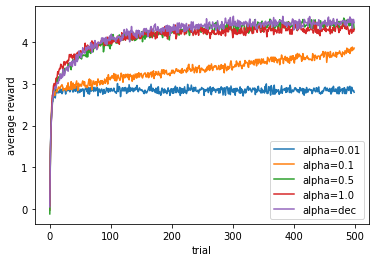

In [28]:
alpha_list = [0.01, 0.1, 0.5, 1.0, 'dec']
epsilon = 0.1
num_test = 1000
trial = 500
for alpha in alpha_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            if alpha == 'dec':
                alphaDec = 1/N[arm]
                Qs[arm] = Qs[arm] + alphaDec * (R - Qs[arm])
            else:
                Qs[arm] = Qs[arm] + alpha * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='alpha='+str(alpha))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

در این روش نیز مانند حالت قبل به وسیله ی آلفا به روزرسانی صورت میگیرد.هر چه مقدار آلفا کمتر باشد، یعنی ارزش کمتری به ریواردهای تازه اضافه شده برای به روزرسانی ولیوها میدهیم. بنابراین سرعت به همگرایی کمتر است. از طرف دیگر هر چه آلفا بیشتر باشد اثر ریواردهای جدید در به روزرسانی ولیو ها بیشتر خواهد بود که منجر به افزایش سرعت همگرایی میشود. از طرفی آلفای بیشتر موجب نوسان در مقدارهای نهایی خواهد شد. 
همان طور که از نمودار ها مشخص است سرعت همگرایی همان طور که گفته شد با افزایش آلفا افزایش یافته است.

alpha = 0.01

با توجه به این که مقدار آلفا بسیار کم است، مقادیر ولیوها در هر مرحله بسیار آهسته به روزرسانی میشوند و با توجه به نزدیک بودن مقادیر ولیوها در هر مرحله الگوریتم گویی به طور تصادفی از بین بازوهای با میانگین ۱ تا ۵( بازوهای با میانگین منفی با توجه به به روزرسانی ها مقادیر منفی خواهند داشت و انتخاب نخواهند شد) انتخاب میکند و بنابراین در نهایت به مقدار 
$(1+2+3+4+5)/5 = 3$ همگرا خواهد شد. توجه کنید با توجه به مقدار کم آلفا اپسیلون گریدی بودن روش کمکی به explore نمیکند چون مقادیر ولیوها بسیار کم تغییر میکنند.

alpha = 0.1

مقدار آلفا نسبت به حالت قبل بیشتر شده و این بار شاهد این هستیم که برخلاف حالت قبل الگوریتم در حال یادگیری است که به دلیل افزایش آلفا و توانایی به روزرسانی ولیوها توسط الگوریتم است. اما همان طور که میبینیم سرعت همگرایی پایین است و نیاز به تعداد گام بیشتری داریم تا به مقدار ریوارد نهایی برسیم. در نهایت ریواردی که الگوریتم به آن همگرا میشود با توجه به این که الگوریتم اپسیلون گریدی با اپسیلون ۰.۱ است مقدار ۴.۵ است.

alpha = [0.5, 1.0]
در این دو حالت نسبت به حالت های قبل باز هم آلفا بیشتر شده است و بنابراین سرعت همگرایی بسیار افزایش یافته است. اما مقدار نهایی پیش بینی میشود که برای آلفا برابر ۰.۵ کمی کمتر از آلفا برابر ۰.۱ و نیز مقدار نهایی در آلفا برابر ۱.۰ کمی کمتر از آلفا برابر ۰.۵ خواهد بود. دلیل این
امر این است که اگر اکشن بهینه انتخاب نشود با توجه به مقدار آلفا ولیو متناظر این اکشن افزایش خواهد داشت که جبران آن با توجه به این که الگوریتم اپسیلون گریدی است سخت خواهد بود.

alpha = dec

همان الگوریتم اپسیلون گریدی است که با توجه به مقدار اپسیلون به مقدار ۴.۵ همگرا میشود.

</font> </div>

## 7. High-variance environment

Let the variance of all arms be 10. Repeat all previous questions. Compare the results.

**Your answer: ```TODO ```**

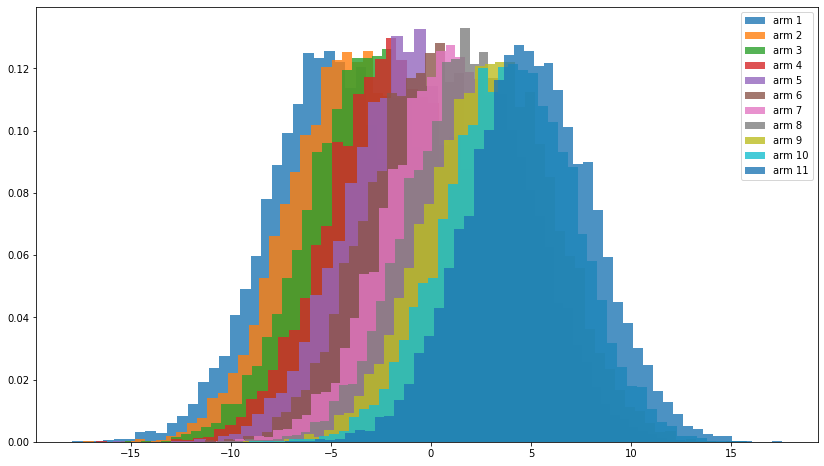

In [12]:
# Reward Distributions
mus = np.array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
sigmas = np.sqrt(np.array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]))
num_arms = len(mus)
sample_size = 10000

plt.figure(figsize=(14,8))
for mu, sigma, idx in zip(mus, sigmas, range(num_arms)):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=50, density=True, alpha=0.8, label=f'arm {idx+1}')
plt.legend()
plt.show()

In [13]:
# change variance
def reward(arm):
    # TODO
    r = np.random.normal(arm-5, np.sqrt(10))
    return r

### 1. Zero-initial and epsilon-greedy policy

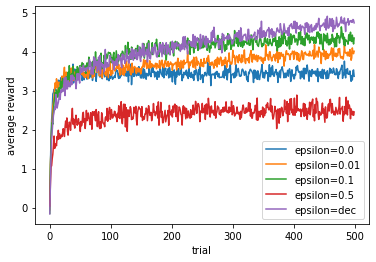

In [19]:
epsilon_list = [0.0, 0.01, 0.1, 0.5, 'dec']
num_test = 1000
trial = 500
for epsilon in epsilon_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if epsilon == 'dec':
                epsilonDec = 0.2 - (i+1)*0.2/trial
                arm = select_arm_e_greedy(Qs, epsilonDec)
            else:
                arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='epsilon='+str(epsilon))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

نکات کلی:

با توجه به این که واریانس افزایش یافته است نسبت به قسمت ۱ این تفاوت را شاهد هستیم که با کشیدن هر بازو، ریوارد خروجی در بازه ی بزرگتری نسبت به حالت قبل قرار دارد و این به طور کلی باعث عدم قطعیت و نوسان بیشتر الگوریتم ها نسبت حالت با واریانس ۱ خواهد شد. از طرف دیگر با این عدم قطعیت بالا در خروجی سرعت همگرایی نیز به طور کلی کاهش میابد.)

همان طور که میبینیم با توجه به نکته ی کلی که گفته شد تنها تغییر نسبت به حالت قبل در این نمودار نوسان بیشتر در ریوارد هاست که با توجه به واریانس بالا در خروجی ریوارد ها منطقی است. 

نکته ی قابل توجه در این قسمت این است که با توجه به واریانس بالا ممکن است بازوهای غیر بهینه با احتمال بیشتری انتخاب میشوند.

</font> </div>

### 2. Optimistic-initial and epsilon-greedy policy

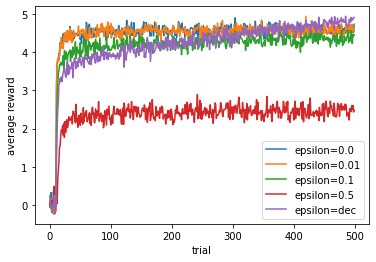

In [ ]:
epsilon_list = [0.0, 0.01, 0.1, 0.5, 'dec']
num_test = 1000
trial = 500
for epsilon in epsilon_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 10 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if epsilon == 'dec':
                epsilonDec = 0.2 - (i+1)*0.2/trial
                arm = select_arm_e_greedy(Qs, epsilonDec)
            else:
                arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='epsilon='+str(epsilon))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

نتایج همانند قسمت ۲ است با این تفاوت که نوسان ها افزایش یافته که به دلیل افزایش واریانس است. از طرفی مقادیر نهایی نسبت به قسمت ۲ کمی کمتر شده است که با توجه به واریانس بالا ممکن است ولیو یک بازوی بهینه بیش از حد کاهش یابد و دیگر به عنوان بازوی بهینه انتخاب نشود که در نهایت ولیو همگرایی نهایی کاهش میابد.

</font> </div>

### 3. Zero-initial and tau-softmax policy

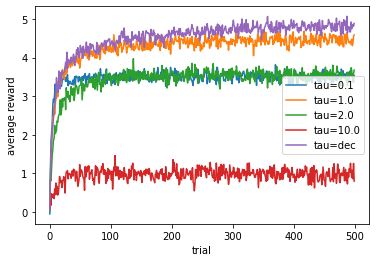

In [ ]:
tau_list = [0.1, 1.0, 2.0, 10.0, 'dec']
num_test = 1000
trial = 500
for tau in tau_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if tau == 'dec':
                tauDec = 1 - (i+1)*0.9/trial
                arm = select_arm_softmax(Qs, tauDec)
            else:
                arm = select_arm_softmax(Qs, tau) 
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='tau='+str(tau))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

نتایج همانند قسمت ۳ است با این تفاوت که نوسان ها افزایش یافته که به دلیل افزایش واریانس است.

</font> </div>

### 4. Optimistic-initial and tau-softmax policy

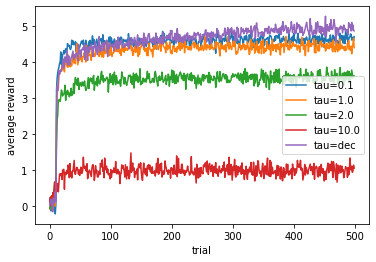

In [ ]:
tau_list = [0.1, 1.0, 2.0, 10.0, 'dec']
num_test = 1000
trial = 500
for tau in tau_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 10 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            if tau == 'dec':
                tauDec = 1 - (i+1)*0.9/trial
                arm = select_arm_softmax(Qs, tauDec)
            else:
                arm = select_arm_softmax(Qs, tau) 
            R = reward(arm)
            N[arm] += 1
            Qs[arm] = Qs[arm] + 1/N[arm] * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='tau='+str(tau))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

نتایج همانند قسمت ۴ است با این تفاوت که نوسان ها افزایش یافته که به دلیل افزایش واریانس است. از طرفی مقادیر نهایی نسبت به قسمت ۴ کمی کمتر شده است که با توجه به واریانس بالا ممکن است ولیو یک بازوی بهینه بیش از حد کاهش یابد و دیگر به عنوان بازوی بهینه انتخاب نشود که در نهایت ولیو همگرایی نهایی کاهش میابد. از طرف دیگر در این قسمت سرعت همگرایی نیز نسبت به قسمت ۴ کاهش یافته است که الگوریتم در به روزرسانی ولیوها مجبور است تعداد بار بیشتری بگردد که موجب کاهش سرعت همگرایی در ابتدای کار شود.

</font> </div>

### 5. Gradient Bandit Algorithms

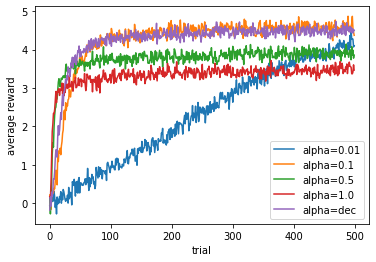

In [42]:
alpha_list = [0.01, 0.1, 0.5, 1.0, 'dec']
num_test = 1000
trial = 500
for alpha in alpha_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Hs = 0 + 0.01 * np.random.rand(num_arms)
        R_avg = 0
        # Trial
        reward_trial_track = []
        for i in range(trial):
            arm, pi = select_arm_GBA(Hs)
            R = reward(arm)
            R_avg = R_avg + (1/(i+1))*(R - R_avg)
            one_arr = np.zeros(11)
            one_arr[arm] = 1.0
            if alpha == 'dec':
                alphaDec = 0.15 - (i+1)*0.1/trial
                Hs = Hs + alphaDec * (R - R_avg) * (one_arr - pi) 
            else:
                Hs = Hs + alpha * (R - R_avg) * (one_arr - pi) 
                
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='alpha='+str(alpha))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

نتایج همانند قسمت ۵ است با این تفاوت که نوسان ها افزایش یافته که به دلیل افزایش واریانس است.

</font> </div>

### 6. Incremental implementation

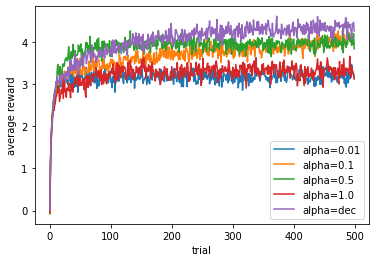

In [22]:
alpha_list = [0.01, 0.1, 0.5, 1.0, 'dec']
epsilon = 0.1
num_test = 1000
trial = 500
for alpha in alpha_list:
    reward_episode_track_sum = np.zeros(trial)
    # Test
    for _ in range(num_test):
        Qs = 0 + 0.01 * np.random.rand(num_arms)
        N = np.zeros(num_arms)
        # Trial
        reward_trial_track = []
        for i in range(trial):
            arm = select_arm_e_greedy(Qs, epsilon)
            R = reward(arm)
            N[arm] += 1
            if alpha == 'dec':
                alphaDec = 1/N[arm]
                Qs[arm] = Qs[arm] + alphaDec * (R - Qs[arm])
            else:
                Qs[arm] = Qs[arm] + alpha * (R - Qs[arm])
            reward_trial_track.append(R)   
        reward_episode_track_sum += np.array(reward_trial_track)
    plt.plot(reward_episode_track_sum/num_test, label='alpha='+str(alpha))
plt.xlabel('trial')
plt.ylabel('average reward')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

بر خلاف حالت های قبل نتایج با حالت متناظر در واریانس کمتر متفاوت شده است.(به جز نوسان که شاهد نوسان بیشتری هستیم.)

در آلفا ۰.۱ سرعت همگرایی بیشتر شده و با سرعت بیشتری همگرا شده که به دلیل اکسپلور بیشتر است. در آلفا ی dec
۰.۵ مقدار نهایی کمتر شده است.
در آلفای ۱.۰ مقدار نهایی بیشتر کم شده که با توجه به مقدار زیاد آلفا و واریانس در صورت انتخاب بازوی اشتباه به عنوان بازوی بهینه جبران سخت خواهد شد و مقدار نهایی کمتر خواهد بود. در آلفا dec
بیشترین مقدار را داشته و کمترین تغییر به نسبت در این حالت اتفاق افتاده است.

</font> </div>

---

# Give Us Feedback

In [23]:
from ipywidgets import Label, IntSlider, Textarea, Button, Layout, HBox, VBox
from IPython.display import clear_output

IntSlider_list = {i:IntSlider(value=3, min=1, max=5) for i in range(6)}
H1 = HBox([Label("How was the homework?")])
H2 = HBox([Label("Please rate the homework from 1 to 5 (lowest to highest).")])
H3 = HBox([Label("The assignment was instructive.", layout=Layout(width="22%")), IntSlider_list[0]])
H4 = HBox([Label("It was not time consuming.", layout=Layout(width="22%")), IntSlider_list[1]])
H5 = HBox([Label("The questions were clear.", layout=Layout(width="22%")), IntSlider_list[2]])
H6 = HBox([Label("The environment was interesting.", layout=Layout(width="22%")), IntSlider_list[3]])
H7 = HBox([Label("The homework was well organized.", layout=Layout(width="22%")), IntSlider_list[4]])
H8 = HBox([Label("Finally, you had a good vibe!", layout=Layout(width="22%")), IntSlider_list[5]])
textarea = Textarea(value='', placeholder='Any comments or suggestions', description='', disabled=False)
button = Button(description='Submit', disabled=False, button_style='', tooltip='Click me', icon='paper-plane')
H9 = HBox([textarea])
H10 = HBox([button])

def ff(button):
    button.button_style = 'success'
    score = sum([IntSlider_list[i].value for i in IntSlider_list]) / 6
    x = round(score*4)/4
    y = int(x) * '🌕' + ((x-int(x))==0 and not x==5) * '🌑' + ((x-int(x))==0.25) * '🌘' + ((x-int(x))==0.5) * '🌗' + ((x-int(x))==0.75) * '🌖' + (4-int(x)) * '🌑'
    clear_output(wait=True)
    display(VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9, H10]))
    print("Thank you for your feedback! 😊")
    print(f"Score: {y}")
    print("\nFeedback:",*[IntSlider_list[i].value for i in IntSlider_list])
    print(textarea.value)

button.on_click(ff)

VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9, H10])

Thank you for your feedback! 😊
Score: 🌕🌕🌕🌗🌑

Feedback: 4 4 4 3 3 3



In [26]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/Colab Notebooks/RL/2'
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html CHW2_400205577.ipynb

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/RL/2
[NbConvertApp] Converting notebook CHW2_400205577.ipynb to html
[NbConvertApp] Writing 1113989 bytes to CHW2_400205577.html
